In [259]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")

In [260]:
device = torch.device("cuda:0")
EV_Title = pd.DataFrame(pd.read_csv('Electric_Vehicle_Title_and_Registration_Activity.csv'))
EV_Title

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,...,Legislative District,2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility,Meets 2019 HB 2042 Electric Range Requirement,Meets 2019 HB 2042 Sale Date Requirement,Meets 2019 HB 2042 Sale Price/Value Requirement,Odometer Reading,Odometer Code,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract
0,Battery Electric Vehicle (BEV),WMWXP3C0XM,2021,MINI,Hardtop,Used,0,August 04 2022,Registration Renewal,2022,...,45.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,Yes,No,5.303302e+10
1,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,Used,0,November 19 2021,Registration Renewal,2021,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,Yes,5.303300e+10
2,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,New,26999,December 31 2018,Original Title,2018,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,True,17,Actual Mileage,Not Applicable,Not Applicable,5.303300e+10
3,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,New,0,December 31 2018,Original Registration,2018,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,No,5.303300e+10
4,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,Used,0,December 23 2019,Registration Renewal,2019,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,Yes,5.303300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617705,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S55H,2017,CHEVROLET,Volt,Used,0,June 19 2018,Registration Renewal,2018,...,27.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No,5.305306e+10
617706,Battery Electric Vehicle (BEV),5YJSA1DN3D,2013,TESLA,Model S,Used,0,August 18 2020,Registration Renewal,2020,...,24.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,Yes,No,5.300900e+10
617707,Battery Electric Vehicle (BEV),5YJSA1DN3D,2013,TESLA,Model S,Used,45600,August 22 2017,Transfer Title,2017,...,24.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,48680,Actual Mileage,Not Applicable,Not Applicable,5.300900e+10
617708,Battery Electric Vehicle (BEV),5YJSA1DN3D,2013,TESLA,Model S,Used,0,August 22 2017,Registration at time of Transfer,2017,...,24.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No,5.300900e+10


In [261]:
features = ['VIN (1-10)','Transaction Type', 'Transaction Year', 'Postal Code']
EV_Title = EV_Title[features]
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
0,WMWXP3C0XM,Registration Renewal,2022,98072.0
1,KNDCM3LD1J,Registration Renewal,2021,98103.0
2,KNDCM3LD1J,Original Title,2018,98103.0
3,KNDCM3LD1J,Original Registration,2018,98103.0
4,KNDCM3LD1J,Registration Renewal,2019,98103.0


In [262]:
EV_Title = EV_Title[EV_Title['Transaction Type'] == 'Original Title']
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
2,KNDCM3LD1J,Original Title,2018,98103.0
6,JTDKARFP1J,Original Title,2018,98311.0
7,5YJ3E1EA3J,Original Title,2018,98034.0
13,5YJ3E1EC9N,Original Title,2022,98006.0
16,1G1FZ6S00K,Original Title,2018,98006.0


In [263]:
EV_Title.drop_duplicates(subset = "VIN (1-10)",keep = False, inplace= True) ##dropping duplicate vins
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
336,WP0CD2Y13N,Original Title,2022,98290.0
1522,5YJRE1A38A,Original Title,2020,98119.0
1693,KMHC75LD4N,Original Title,2022,98029.0
2486,WAUUPBFF4J,Original Title,2019,98107.0
2833,WMEFJ9BA9K,Original Title,2019,98040.0


In [264]:
features = ['Transaction Year']
EV_Title_Year = EV_Title[features]
EV_Title_Year.head()

,Transaction Year
336,2022
1522,2020
1693,2022
2486,2019
2833,2019


In [266]:
#np.amin(EV_Title_Year)

In [267]:
def findingyears(year):
    x=np.where(EV_Title_Year == year)
    return x

In [268]:
arr = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 
x = findingyears(arr[0])
x = np.array(x)
EV_Title_Year.insert(loc = 2, column = "Number of EV", value = x.size/2)

In [278]:
EV_Title_Year[2:3]

,Transaction Year,Number of EV
1693,2022,3.0


<AxesSubplot:>

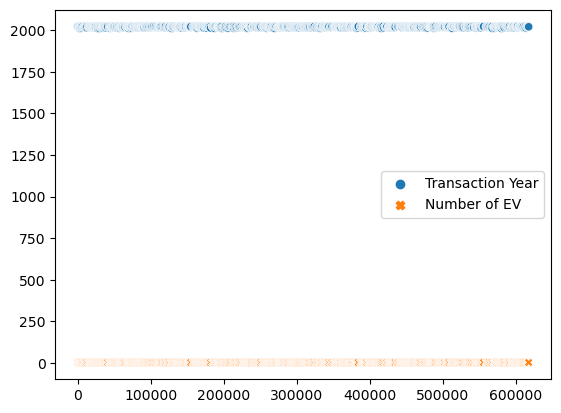

In [270]:
sns.scatterplot(EV_Title_Year)